In [4]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications import InceptionV3


In [29]:
# Data augmentation with InceptionV3-specific preprocessing
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.2
                            )

In [6]:
# Load and prepare the training data
train_data = datagen.flow_from_directory(
    '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
    target_size=(299, 299),  # InceptionV3 default input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2931 images belonging to 5 classes.


In [7]:
# Load and prepare the validation data
valid_data = datagen.flow_from_directory(
    '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 731 images belonging to 5 classes.


In [8]:
# Learning rate scheduler function
def lr_rate(epoch, lr):
    if epoch < 10:
        lr = 0.0001
        return lr
    elif epoch <= 15:
        lr = 0.0005
        return lr
    elif epoch <= 30:
        lr = 0.0001
        return lr
    else:
        lr = lr * (epoch / (1 + epoch))
        return lr


In [9]:
# Define the InceptionV3 model
inception_model = InceptionV3(
    input_shape=(299, 299, 3),
    weights='/kaggle/input/weight/inception_v3_weights_tf_dim_ordering_tf_kernels_notop (1).h5',
    include_top=False
)

2023-12-18 17:19:53.858839: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859001: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859102: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859190: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859265: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859476: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-18 17:19:53.859568: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

In [10]:
# Build the custom model using InceptionV3 as base
model = tf.keras.Sequential([
    inception_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21813029 (83.21 MB)
Trainable params: 21778597 (83.08 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [12]:
# Define the lr_callback after compiling the model
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [13]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=20,verbose=1)

Epoch 1/20
92/92 [==============================] - 266s 3s/step - loss: 0.7626 - accuracy: 0.7219 - val_loss: 0.7221 - val_accuracy: 0.7483 - lr: 1.0000e-04
Epoch 2/20
92/92 [==============================] - 243s 3s/step - loss: 0.5852 - accuracy: 0.7806 - val_loss: 0.5724 - val_accuracy: 0.7798 - lr: 1.0000e-04
Epoch 3/20
92/92 [==============================] - 238s 3s/step - loss: 0.4731 - accuracy: 0.8280 - val_loss: 0.7846 - val_accuracy: 0.6990 - lr: 1.0000e-04
Epoch 4/20
92/92 [==============================] - 239s 3s/step - loss: 0.3792 - accuracy: 0.8646 - val_loss: 0.5869 - val_accuracy: 0.7811 - lr: 1.0000e-04
Epoch 5/20
92/92 [==============================] - 237s 3s/step - loss: 0.3113 - accuracy: 0.8884 - val_loss: 0.6993 - val_accuracy: 0.7743 - lr: 1.0000e-04
Epoch 6/20
92/92 [==============================] - 237s 3s/step - loss: 0.2311 - accuracy: 0.9147 - val_loss: 0.7386 - val_accuracy: 0.7798 - lr: 1.0000e-04
Epoch 7/20
92/92 [==============================] - 

In [32]:
# Load and prepare the test data
test_data = datagen.flow_from_directory(
    '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 731 images belonging to 5 classes.


In [33]:
# Evaluate the model on the test data
evaluation_result = model.evaluate(test_data, verbose=1, batch_size=128)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])


23/23 [==============================] - 19s 818ms/step - loss: 0.7513 - accuracy: 0.8057
Test Loss: 0.7513445019721985
Test Accuracy: 0.805745542049408


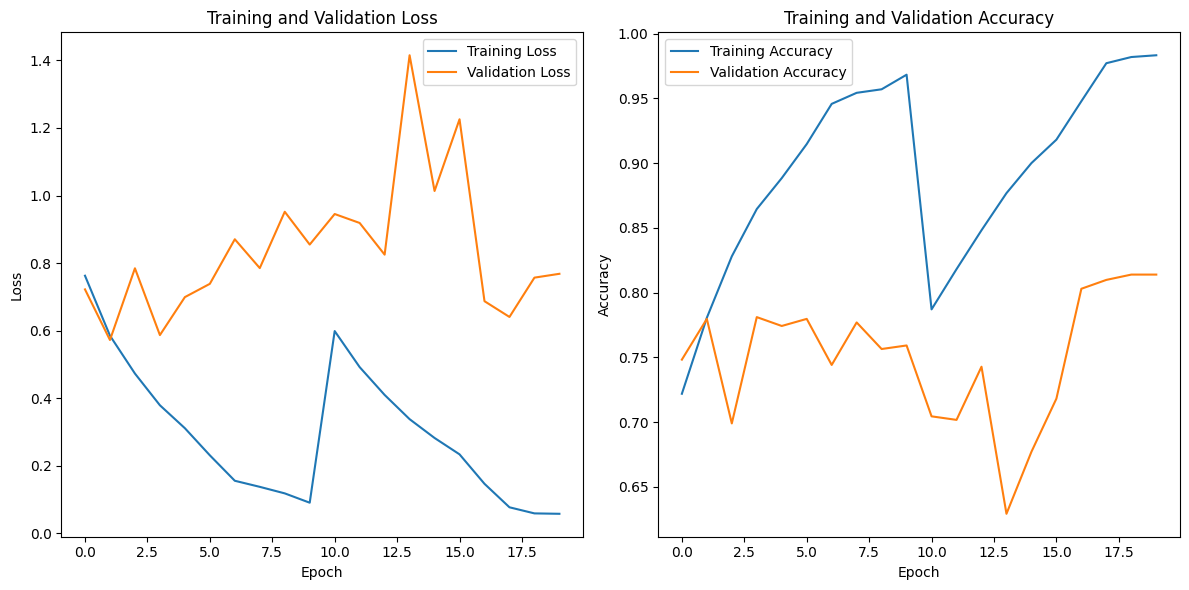

In [35]:



# Predictions on test data
#y_pred = model.predict(test_data)
#y_pred_classes = np.argmax(y_pred, axis=1)
#true_classes = test_data.classes
#class_labels = list(test_data.class_indices.keys())

# Classification Report
#print("Classification Report:")
#print(classification_report(true_classes, y_pred_classes, target_names=class_labels))

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Training and Validation Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt